In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/mark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def remove_stopwords(text):
    output = ' '.join([word for word in text.split(
        ) if word not in english_stop_words])
    return output

In [4]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

In [5]:
print(f"Train Length: {len(train_df)}")

Train Length: 1490


In [6]:
train_df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [7]:
print(f"Test Length: {len(test_df)}")

Test Length: 735


In [7]:
test_df['Category'].value_counts()

sport            147
entertainment    147
tech             147
business         147
politics         147
Name: Category, dtype: int64

In [8]:
train_df['Text'] = train_df['Text'].apply(remove_stopwords)

In [9]:
full_df = train_df.append(test_df)
print(f"Full dataset length: {len(full_df)}")

Full dataset length: 2225


In [10]:
full_df.head()

,ArticleId,Text,Category
0,1833.0,worldcom ex-boss launches defence lawyers defe...,business
1,154.0,german business confidence slides german busin...,business
2,1101.0,bbc poll indicates economic gloom citizens maj...,business
3,1976.0,lifestyle governs mobile choice faster better ...,tech
4,917.0,enron bosses $168m payout eighteen former enro...,business


In [11]:
full_df['Category'].value_counts()

sport            493
business         483
politics         421
entertainment    420
tech             408
Name: Category, dtype: int64

<AxesSubplot:>

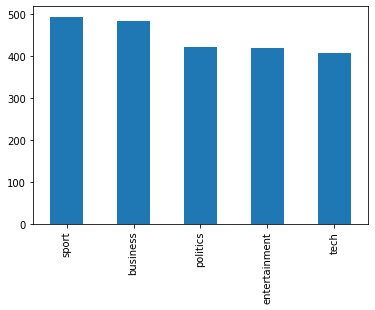

In [12]:
full_df['Category'].value_counts().plot.bar()

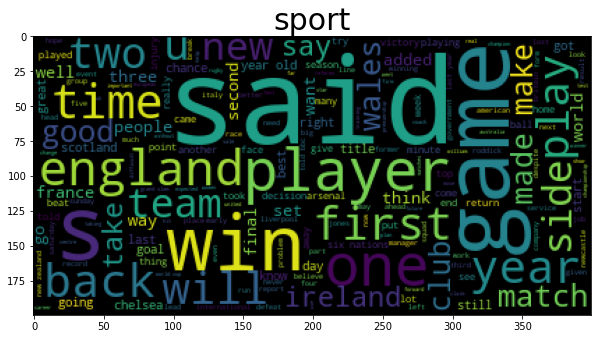

In [13]:
sport_wordcloud = WordCloud().generate(' '.join(full_df[full_df['Category'] == 'sport']['Text']))
plt.figure(figsize=(10, 10))
plt.title("sport", fontsize=30)
plt.imshow(sport_wordcloud)

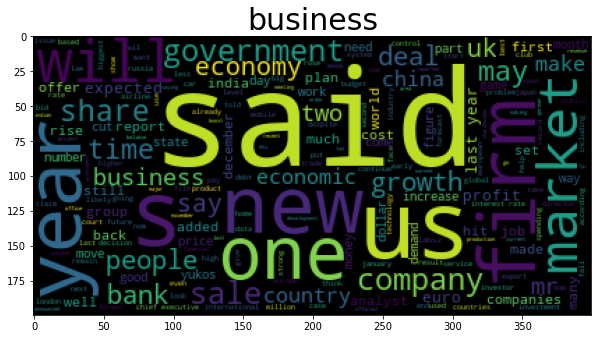

In [14]:
business_wordcloud = WordCloud().generate(' '.join(full_df[full_df['Category'] == 'business']['Text']))
plt.figure(figsize=(10, 10))
plt.title("business", fontsize=30)
plt.imshow(business_wordcloud)

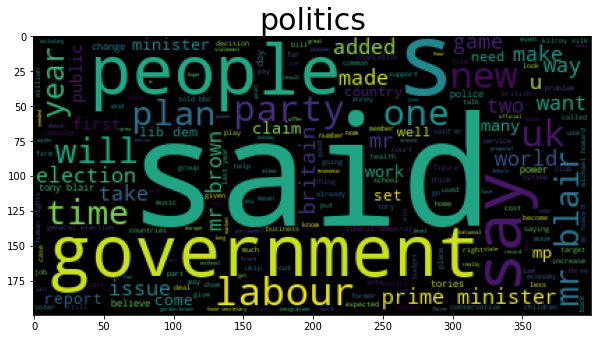

In [15]:
politics_wordcloud = WordCloud().generate(' '.join(full_df[full_df['Category'] == 'politics']['Text']))
plt.figure(figsize=(10, 10))
plt.title("politics", fontsize=30)
plt.imshow(politics_wordcloud)

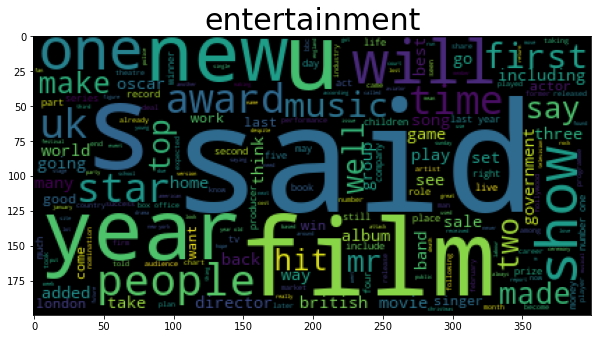

In [16]:
entertainment_wordcloud = WordCloud().generate(' '.join(full_df[full_df['Category'] == 'entertainment']['Text']))
plt.figure(figsize=(10, 10))
plt.title("entertainment", fontsize=30)
plt.imshow(entertainment_wordcloud)

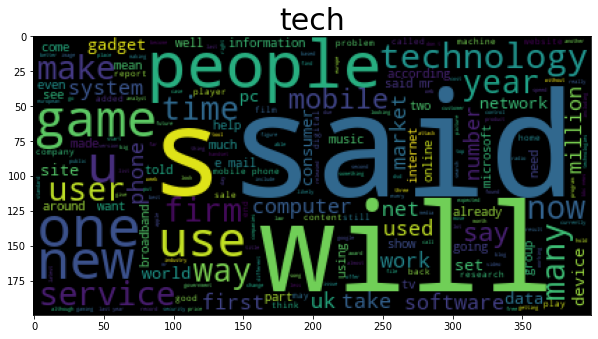

In [17]:
tech_wordcloud = WordCloud().generate(' '.join(full_df[full_df['Category'] == 'tech']['Text']))
plt.figure(figsize=(10, 10))
plt.title("tech", fontsize=30)
plt.imshow(tech_wordcloud)